# TASK 05

In [1]:
# Install required libraries first
!pip install nltk textblob 

In [2]:
# Import required libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import matplotlib.pyplot as plt
import string

# Download stopwords 
nltk.download('stopwords')

# Preprocess text
def preprocess_text(text):
    """Lowercase, remove punctuation and stopwords"""
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PMLS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
def get_sentiment(text):
    """Return sentiment label based on polarity"""
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

First few rows of the dataset:
                                                text
0   I love learning about data science! #DataScience
1  Data science is so hard, I feel like giving up...
2  I'm neutral about machine learning. It's okay....
3  Just got a job as a data scientist, feeling am...
4     The results of my model were terrible... #fail

Sentiment distribution:
sentiment
Positive    5
Negative    4
Neutral     1
Name: count, dtype: int64


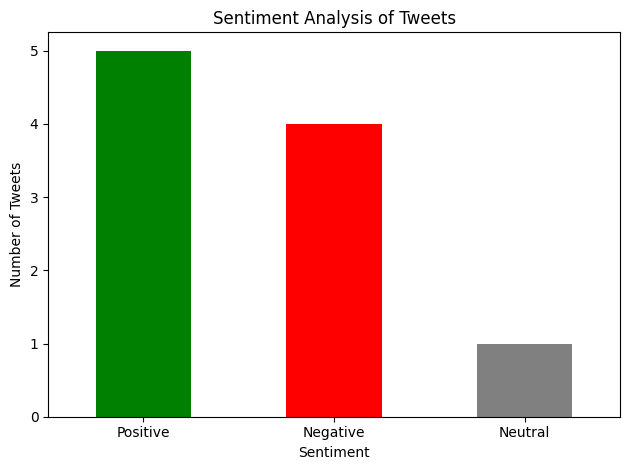

In [4]:

def main():
    # Load the CSV file
    df = pd.read_csv('C:/Users/PMLS/OneDrive/Desktop/sample_tweets/sample_tweets.csv')  
    print("First few rows of the dataset:")
    print(df.head())

    # Preprocess the text
    df['text'] = df['text'].astype(str)
    df['cleaned_text'] = df['text'].apply(preprocess_text)

    # Apply sentiment analysis
    df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

    # Show sentiment distribution
    sentiment_counts = df['sentiment'].value_counts()
    print("\nSentiment distribution:")
    print(sentiment_counts)

    # Plotting
    colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'gray'}
    sentiment_counts.plot(kind='bar', color=[colors.get(x) for x in sentiment_counts.index])
    plt.title('Sentiment Analysis of Tweets')
    plt.xlabel('Sentiment')
    plt.ylabel('Number of Tweets')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Entry point
if __name__ == '__main__':
    main()